# Métodos Numéricos 

## Guía 3: Interpolación y aproximación polinomial (Abril 2023)

In [1]:
using Plots
using LaTeXStrings

### Problema 1

1. Usando los puntos interpolantes $x_0 = 0$, $x_1=0.6$ y $x_2=0.9$, construya analíticamente los polinomios interpolantes de Lagrange de grado 1 y 2 que aproximen las funciones
  
    **a.** $f(x) = \ln (x+1)$ y 
    
    **b.** $g(x) = \sqrt{x+1}$ 
    
    en $x=0.45$.

2. Encuentre los errores absolutos y relativos correspondientes.

3. En el rango dado $[x_0,x_2]$, grafique ambas funciones, sus polinomios interpolantes y correspondientes aproximaciones de Taylor de grado 2 entorno a $x_0$. Agregue al gráfico los puntos interpolantes $(x_i,f(x_i))$ (o $(x_i,g(x_i))$ según corresponda) usando símbolos en vez de curvas.

In [2]:
f(x) = log(x + 1)
g(x) = sqrt(x + 1)
x0 = 0
x1 = 0.6 
x2 = 0.9
xr = 0.45

0.45

In [3]:
L1(x)= ((x - x1)/(x0 - x1))*((x - x2)/(x0 - x2))
L2(x)= ((x - x0)/(x1 - x0))*((x - x2)/(x1 - x2))
L3(x)= ((x - x0)/(x2 - x0))*((x - x1)/(x2 - x1))

L3 (generic function with 1 method)

In [4]:
PLf(x)= f(x0)*L1(x) + f(x1)*L2(x) + f(x2)*L3(x)
PLg(x)= g(x0)*L1(x) + g(x1)*L2(x) + g(x2)*L3(x)

PLg (generic function with 1 method)

In [5]:
println(PLf(xr),"   ",PLg(xr))

0.36829061135835384   1.2034237282735152


In [6]:
eabsf = abs(f(xr)-PLf(xr))
erelf = abs(f(xr)-PLf(xr))/abs(f(xr))
eabsg = abs(g(xr)-PLg(xr))
erelg = abs(g(xr)-PLg(xr))/abs(g(xr))

0.0006109901814915869

In [7]:
println(eabsf,"  ",erelf,"  ",eabsg,"  ",erelg)

0.0032729450741291743  0.008808573977367187  0.0007357296057144413  0.0006109901814915869


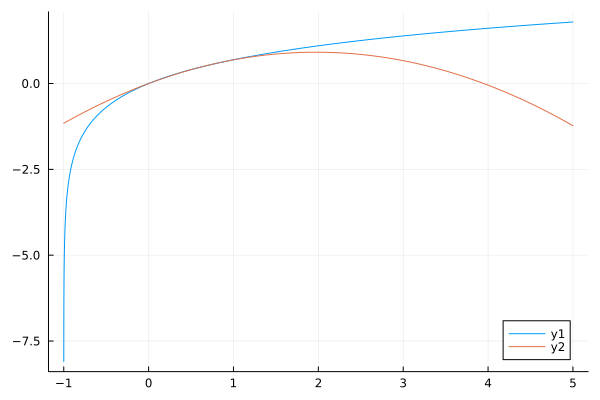

In [8]:
plot(f)
plot!(PLf)

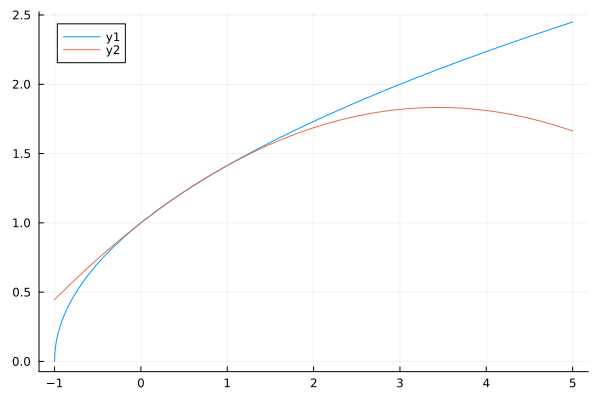

In [9]:
plot(g)
plot!(PLg)

### Problema 2

1. Escriba una función que evalúe el **polinomio interpolante de Lagrange** $P$ en un punto $x$ con $x_0 < x < x_n$ siendo $(x_i,y_i)$ para $i=0,...,n$ los puntos a interpolar. La función debe tomar como argumentos de entrada: **i)** el valor $x$, **ii)** un arreglo $v$ de valores $x_i$ y **iii)** un arreglo $w$ de valores $y_i$, y debe retornal el valor $P(x)$.

2. Para cada función del **Problema 1**, realice un gráfico de $P$ sobre $N=200$ puntos equidistantes en el intérvalo $[x_0,x_n]$ interpolando los puntos $(x_i,y_i) = (x_i,f(x_i))$ para $i=0,1,2$. Incluya en curvas punteadas la función y en símbolos para los puntos interpolantes. **Ayuda:** no confundir los $N$ puntos usados para graficar, con los $n$ puntos interpolación.

3. Gráfique la diferencia entre los polinomios y las funciones.

In [10]:
function Li(i::Int64,
    x::Float64,
    xvec::Vector{Float64}
    )::Float64
    L = 1.0
    xi = xvec[i]
    for j ∈ 1:i-1
        xj = xvec[j]
        L *= (x-xj)/(xi-xj)
    end
    for j ∈ i+1:length(xvec)
        xj = xvec[j]
        L *= (x-xj)/(xi-xj)
    end
    return L
end

Li (generic function with 1 method)

In [11]:
function PL(x::Float64,
    xvec::Vector{Float64},
    yvec::Vector{Float64}
    )::Float64
    Pl = 0.0
    for i ∈ 1:length(xvec)
        Pl += yvec[i]*Li(i,x,xvec)
    end
    return Pl
end

PL (generic function with 1 method)

In [12]:
f(x) = log(x + 1)
n = 200
puntos = [0.1 + 1 * (i-1)/(n-1) for i in 1:n]
valorfuncion = f.(puntos)
PLf(x) = PL(x,puntos,valorfuncion)

PLf (generic function with 1 method)

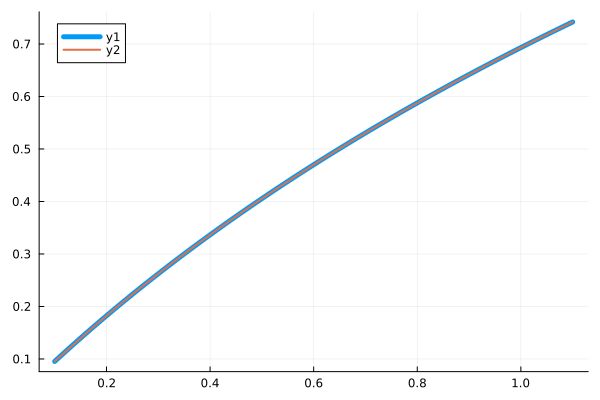

In [13]:
plot(puntos,PLf.(puntos),
    lw = 5,
    #xlims = (0.4,.05)
    )
plot!(f, lw=2)

In [14]:
g(x) = sqrt(x + 1)
n = 200
puntos = [0.1 + 1 * (i-1)/(n-1) for i in 1:n]
valorfuncion = g.(puntos)
PLg(x) = PL(x,puntos,valorfuncion)

PLg (generic function with 1 method)

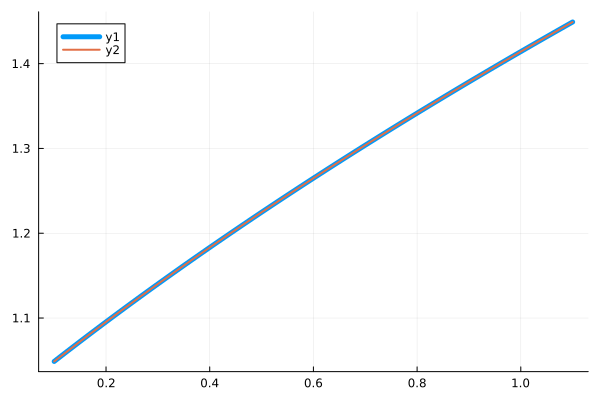

In [15]:
plot(puntos,PLg.(puntos),
    lw = 5,
    #xlims = (0.4,.05)
    )
plot!(g, lw=2)

### Problema 3

Se desea aproximar $\cos(x)$ en el intervalo $[0,1]$ con un error absoluto menor a $1\times 10^{-7}$ para todo $x \in [0,1]$. 

1. Usando el teorema del error de la interpolación polinomial, estime el número de puntos de interpolación que son necesarios para conseguir el máximo error absoluto mencionado.

2. Grafique el error absoluto en el intervalo en cuestión para tres casos particulares de $\{x_i\}$: *i)* puntos equidistantes $x_i=i/n$, **ii)** puntos al azar y **iii)** puntos distribuidos heterogéneamente $x_i=1/i$.

In [16]:
# hacemos esto para el coseno, su derivada segunda es -cos(x) y en el intervalo [0,1] su máximo valor es 1
# y como el error que buscamos es 10e-7
h = sqrt(10e-7 * 8)
N = floor(Int64,1/h) + 1

354

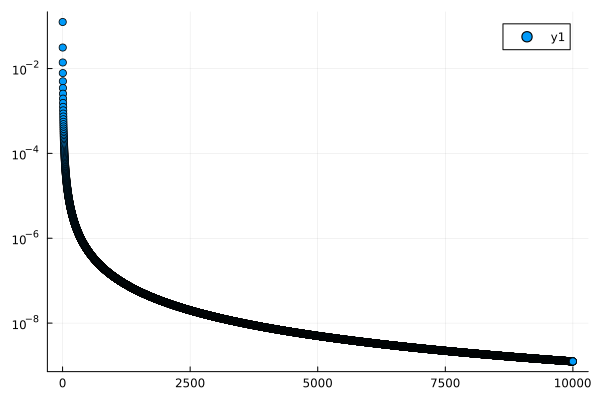

In [17]:
# N-1 = 1/h, entonces h = 1/(N-1)
e(n) = 1/((n-1)^2*8)
puntos= 2:10000
scatter(puntos,e.(puntos),
yaxis=:log)

### Problema 4

Construya analíticamente el polinomio interpolante de Newton para las siguientes funciones. 
De una cota del error absoluto en el intervalo $[x_0,x_n]$.

**a.** $f(x) = \exp (2x) \cos(3x)$ para $x_0=0$, $x_1=0.3$ y $x_2=0.6$.

**b.** $g(x) = \ln(x)$ para $x_0=1$, $x_1=1.1$, $x_2=1.3$ y $x_3=1.4$.

**Teoría**

La forma del polinomio interpolante de Newton es:
$$
P(x)
=
f_0+
f_{0,1}(x-x_0)+
f_{0,1,2}(x-x_0)(x-x_1)+
...
f_{0,1,2,...,n}(x-x_0)(x-x_1)...(x-x_{n-1})
$$
donde
$$
f_i=f(x_i),
$$
$$
f_{ij}=\frac{f_i-f_j}{x_i-x_j},
$$
y
$$
f_{i,i+1,...,j-1,j}=\frac{f_{i,i+1,...,j-1}-f_{i+1,...,j-1,j}}{x_i-x_j}
$$
para todo $i<j$.

In [18]:
# Como n=3 necesito x0, x1 , x2 y x3
g(x)=log(x)
x0=1
x1=1.1
x2=1.3
x3=1.4
# Primero:
g_x1_x0 = (g(x1)-g(x0))/(x1-x0)
g_x2_x1 = (g(x2)-g(x1))/(x2-x1)
g_x3_x2 = (g(x3)-g(x2))/(x3-x2)
# Segundo:
g_x2_x1_x0 = (g_x2_x1 - g_x1_x0)/(x2-x0)
g_x3_x2_x1 = (g_x3_x2 - g_x2_x1)/(x3-x1)
# Tercero:
g_x3_x2_x1_x0 = (g_x3_x2_x1 - g_x2_x1_x0)/(x3-x0)

0.19700560790671803

In [19]:
PNg(x) = g(x0) + (x-x0)*g_x1_x0 + (x-x0)*(x-x1)*g_x2_x1_x0 + (x-x0)*(x-x1)*(x-x2)*g_x3_x2_x1_x0

PNg (generic function with 1 method)

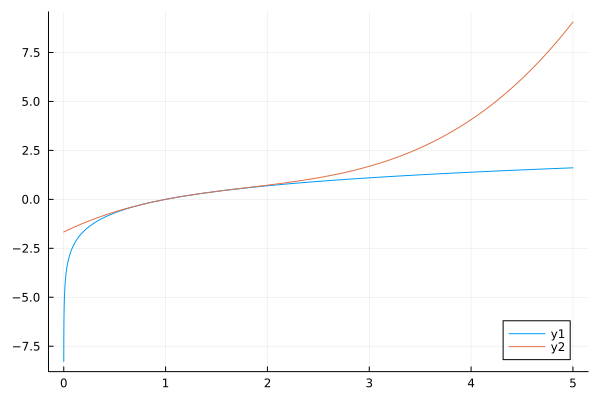

In [20]:
plot(g)
plot!(PNg)

In [21]:
# Como n=2 necesito x0, x1 y x2
f(x)=exp(2x)*cos(3x)
x0=0.0
x1=0.3
x2=0.6
# Primero:
f_x1_x0 = (f(x1)-f(x0))/(x1-x0)
f_x2_x1 = (f(x2)-f(x1))/(x2-x1)
#f_x3_x2 = (f(x3)-f(x2))/(x3-x2)
# Segundo:
f_x2_x1_x0 = (f_x2_x1 - f_x1_x0)/(x2-x0)
#f_x3_x2_x1 = (f_x3_x2 - f_x2_x1)/(x3-x1)
# Tercero:
#f_x3_x2_x1_x0 = (f_x3_x2_x1 - f_x2_x1_x0)/(x3-x0)

-11.220177438133113

In [22]:
# Como n=2 necesito x0, x1 y x2
f(x)=exp(2x)*cos(3x)
x0=0.0
x1=0.3
x2=0.6
# Primero:
f_x1_x0 = (f(x1)-f(x0))/(x1-x0)
f_x2_x1 = (f(x2)-f(x1))/(x2-x1)
#f_x3_x2 = (f(x3)-f(x2))/(x3-x2)
# Segundo:
f_x2_x1_x0 = (f_x2_x1 - f_x1_x0)/(x2-x0)
#f_x3_x2_x1 = (f_x3_x2 - f_x2_x1)/(x3-x1)
# Tercero:
#f_x3_x2_x1_x0 = (f_x3_x2_x1 - f_x2_x1_x0)/(x3-x0)

-11.220177438133113

In [23]:
PNf(x) = f(x0) + (x-x0)*f_x1_x0 + (x-x0)*(x-x1)*f_x2_x1_x0

PNf (generic function with 1 method)

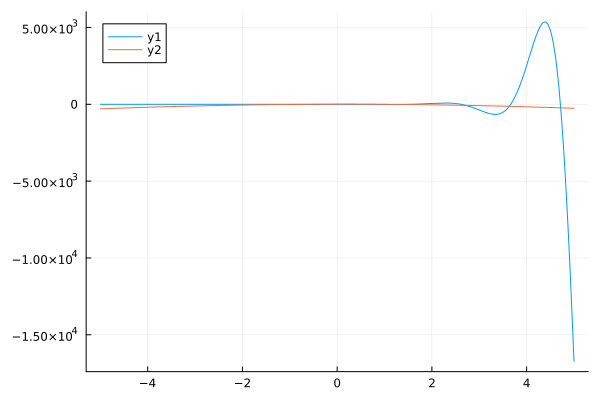

In [24]:
plot(f)
plot!(PNf)

### Problema 5

1. Escriba una función que evalúe el **polinomio interpolante de Netwon** $P$ en un punto $x$ con $x_0 < x < x_n$ siendo $(x_i,y_i)$ para $i=0,...,n$ los puntos a interpolar. La función debe tomar como argumentos de entrada: **i)** el valor $x$, **ii)** un arreglo $v$ de valores $x_i$ y **iii)** un arreglo $w$ de valores $y_i$, y debe retornal el valor $P(x)$.

2. Grafique los polinomios interpolantes de Newton para las funciones del **problema 4** en $N=200$ puntos equidistantes en el intervalo $[x_0,x_n]$ correspondiente. Incluya en el grafico las curvas de las funciones y, con símbolos, los puntos de interpolación.

3. Repita 1. y 2. pero usando puntos de interpolación determinados por $n=80$ valores equidistantes de $x_i$ en $[0,0.6]$ para $f$ y $[1,1.4]$ para $g$.

4. Repita 3. pero usando `BigFloat` en vez de `Float64`.

5. Interprete lo observado.

In [25]:
# Quiero un algoritmo para calcular las diferencias divididas para cada valor 
function dif_div(n::Int64,
        xvals::Vector{Float64},
        yvals::Vector{Float64}
        )
    i=1
    f = zeros(n,n)
    f[:,1]=yvals
    #for i ∈ 1:n
    #    f[i,1]=yvals[i]
    #end
    for i ∈ 1:n
        for j ∈ 2:i
            f[i,j] = (f[i,j-1]-f[i-1,j-1])/(xvals[i]-xvals[i-j+1])
        end
    end
    return f
end
# Esta función retorna f que es una matriz nxn donde la diagonal son las diferencias divididas necesarias.
# Entonces para formar el polinomio interpolante para una funcion g es:
# PNg(x) = f[1,1] + (x-x0)*f[2,2] + (x-x0)*(x-x1)*f[3,3]

dif_div (generic function with 1 method)

In [26]:
function PN(x::Float64,
    n::Int64,
    xvals::Vector{Float64},
    yvals::Vector{Float64},
    )
    M = dif_div(n,xvals,yvals)
    P=M[1,1]
    N=1
    for i ∈ 1:(n-1)
        N=1
        for j ∈ 1:i
            N *= (x-xvals[j])
        end
        P += M[i+1,i+1]*N
    end
    return P
end

PN (generic function with 1 method)

In [27]:
# Pueba de la funcion dif_div_i
f(x)=exp(2x)*cos(3x)
x0=0.0
x1=0.3
x2=0.6
xvec = [x0,x1,x2]
yvec = f.(xvec)
println(yvec)
n = 2
asd = dif_div(3,xvec,yvec)
print(f_x2_x1_x0,"   ",f_x1_x0,"   ",f(x0))
asd

[1.0, 1.1326472096961255, -0.7543375194717092]
-11.220177438133113   0.4421573656537518   1.0

3×3 Matrix{Float64}:
  1.0        0.0         0.0
  1.13265    0.442157    0.0
 -0.754338  -6.28995   -11.2202

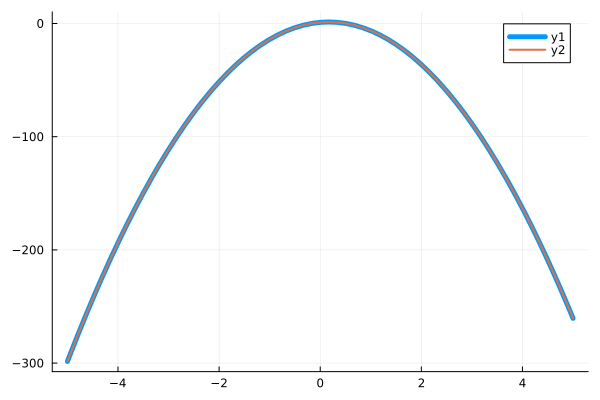

In [28]:
PNewton(x)=PN(x,3,xvec,yvec)
#PNf(x)
plot(PNf, 
    lw=5
    #xlims=(-2,2)
    )
plot!(PNewton,lw=2)

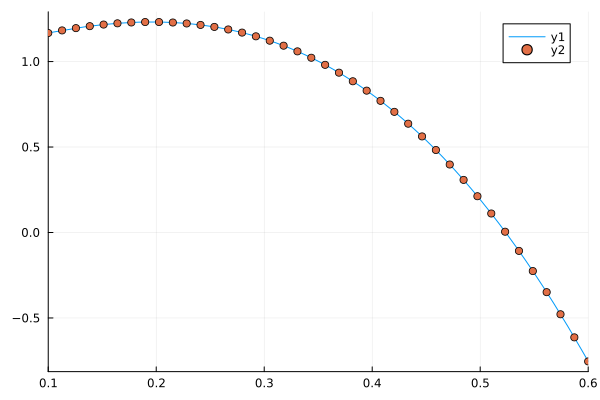

In [29]:
#Ahora tengo que probar la funcion para 200 puntos 
#[xi + (xf -xi)*(i-1)/(n-1) for i in 1:n]
f(x)=exp(2x)*cos(3x)
n = 40
puntos = [0.1 + (0.6-0.1) * (i-1)/(n-1) for i in 1:n]
valorfuncion = f.(puntos)
PNewtonf(x) = PN(x,n,puntos,valorfuncion)
plot(f, 
    xlims=(0.1,0.6)
    )
scatter!(puntos,PNewtonf.(puntos))


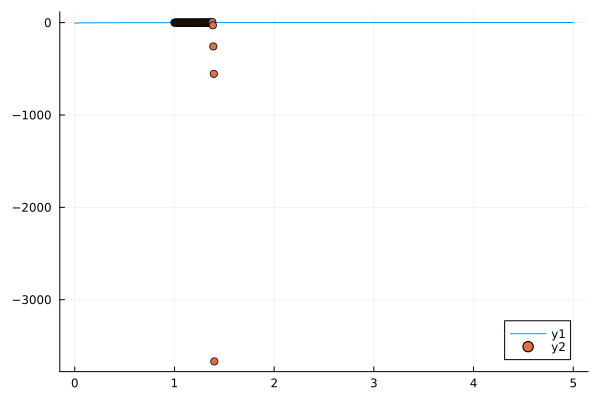

In [30]:
#Ahora tengo que probar la funcion para 200 puntos 
#[xi + (xf -xi)*(i-1)/(n-1) for i in 1:n]
g(x)=log(x)
n = 80
punto = [1 + (1.4-1) * (i-1)/(n-1) for i in 1:n]
valorfuncio = g.(punto)
PNewtong(x) = PN(x,n,punto,valorfuncio)
plot(g, 
   # xlims=(1,1.4)
    )
scatter!(punto,PNewtong.(punto))

In [31]:
dif_div(8,puntos,valorfuncion)

LoadError: DimensionMismatch: tried to assign 40-element array to 8×1 destination

### Problema 6

Considere la función definida por $f(x) = \frac{1}{1 + 25 x^2}$.

1. Grafique la función $f$ en el intervalo $[-1,1]$.

Para cada valor de $n\in \{5, 10, 20\}$:

2. Calcule la interpolación de $f$ por el **método de Lagrange** usando $n+1$ valores equidistantes de $x$ en el intervalo mencionado.

3. Añada al gráfico una curva del polinomio interpolante evaluandolo en 200 puntos equidistantes en los rangos $x=[-1,1]$ e $y=[-1.5,1.5]$.

4. Calcule el error máximo para cada caso e incluya estos datos de errores máximos en el gráfico.

**Nota:** En este problema se observa el llamado fenómeno de Runge, en el que la interpolación
por polinomios usando puntos equiespaciados da resultados divergentes.

5. ¿Por qué no hay contradicción con el teorema de aproximación de Weierstrass?

6. En vez de puntos equiespaciados, pruebe usando el espaciamiento de Chebyshev dado por $ x_i = -\cos( \pi (i-1)/n )$, para $i=1,2,...,n+1$. ¿Disminuye significativamente el error en este caso?

## Ejercicios Complementarios

### Problema C.1

Considere el siguiente polinomio:
$$
p(x) = -10 + 5 x - 12 x^2  + 6 x^3  - 2 x^4  + x^5 \ ,
$$

1. Grafíquelo y observe que posee una única raíz real positiva.

2. Calcule a mano su derivada y grafíquela.

3. Evalúe el polinomio y su derivada utilizando el algoritmo de Horner. Grafique nuevamente comparando con las versiones anteriores.

4. Encuentre la raíz del polinomo utilizando el método de Newton-Raphson, eligiendo el valor inicial $p_1$ utilizando los teoremas que acotan la región del espacio complejo donde se encuentran las raíces.

**Ayuda: Teorema de las cotas de Hirst-Macey**

Sea $p(x) = a_0 + a_1x + a_2x^2+...+a_nx^n$ un polinomio sobre $\mathbb{C}$ de grado $n\geq 1$ y coeficientes $a_i\in \mathbb{C}$ para $i=0,1,...,n$. Luego, si $x$ es una raíz de $p$, entonces $|x|\leq \max\{1,\sum_{i=0}^{n-1}\left|\frac{a_i}{a_n}\right|\}$.

**Referencias:**

https://www.jstor.org/stable/2687152

### Problema C.2: Error  de la interpolación polinomial para puntos equiespaciados

Usando el teorema dado en el teórico, demuestre el siguiente corolario.

**Corolario:** Sea $f \varepsilon C_{[a,b]}^{(n+1)}$  tal que $\exists M>0 / |f^{(n+1)}(x) |< M \;\forall \,x\varepsilon [a,b]$ (i.e. su $n+1$-ésima derivada es acotada en $[a,b]$). Sea $x_i=a + i \;; i=0,\cdots,n$ donde $ h=(b-a)/n$. Sea $P_n$ es el polinomio de grado $n$ interpolante a $f$ en los puntos $x_i$ (i.e. $P_n(x_i)=f(x_i)\;,i=0,\cdots ,n$). Entonces, $\forall\;x\varepsilon [a,b]$ se tiene
$$
\left| f(x) - P_n(x)\right | \leq \frac{M}{4 (n+1)}\;\left(\frac{b-a}{n}\right)^{n+1}
$$